In [78]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('icpc-2018.csv')

In [80]:
df.sample(frac=0.65)

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,...,Contestant 3,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize
40,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,41,Institut Teknologi Bandung,Indonesia,Ainge ST,Alfonsus Raditya Arsadjaja,...,Wiwit Rifai,False,False,False,True,5,11,0.45,788,NaN
60,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,61,The Chinese University of Hong Kong,Hong Kong,ACellent,Lik Hang Poon,...,Wai Pan Yik,False,False,False,True,4,11,0.36,417,NaN
108,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,109,University of Waterloo,Canada,Waterloo White,Ahmed Sabie,...,Yesung Jung,False,False,False,True,3,11,0.27,517,NaN
27,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,28,Zhongshan (Sun Yat-sen) University,China,SYSU_Iron,Tanli Zuo,...,Zhengjie Xu,False,False,False,True,6,11,0.55,1095,NaN
87,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,88,University of Bergen,Norway,Garbage Collectors,Davide Pallotti,...,Olav Røthe Bakken,False,False,False,True,4,11,0.36,827,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,19,Fudan University,China,Wood Cube,Dongjian Tang,...,Zhihao Ma,False,False,False,True,6,11,0.55,852,NaN
8,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,9,St. Petersburg ITMO University,Russia,SPb ITMO University 1,Ilya Zban,...,Mikhail Putilin,False,False,True,False,7,11,0.64,1086,NaN
14,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,15,University of Engineering and Technology - VNU,Viet Nam,unsigned,Dinh Quang Minh Nguyen,...,Nguyen Pham,False,False,False,True,6,11,0.55,757,NaN
47,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,48,Tokyo Institute of Technology,Japan,ninjaribaton,Mikito Ota,...,Takuto Yoshida,False,False,False,True,5,11,0.45,951,NaN


In [81]:
df['Prize'].unique()

array(['World Champion, Northern Eurasia Champion', nan,
       'Asia East Champion', 'Asia Pacific Champion',
       'North America Champion', 'Europe Champion',
       'Latin America Champion', 'Asia West Champion',
       'Africa and the Middle East Champion'], dtype=object)

In [82]:
df['Prize'] = df['Prize'].map({'World Champion, Northern Eurasia Champion': 0, 'Asia East Champion': 1, 'Asia Pacific Champion': 2, 'North America Champion': 3, 'Europe Champion': 4, 'Latin America Champion': 5, 'Asia West Champion': 6, 'Africa and the Middle East Champion': 7})

In [83]:
df['Prize'] = df['Prize'].fillna(df['Prize'].mean())

In [84]:
data = df.drop(['Year', 'Date', 'Host', 'City', 'Venue', 'Rank', 'University', 'Total', 'Gold', 'Silver', 'Bronze', 'Honorable', 'Team', 'Contestant 1', 'Contestant 2', 'Contestant 3', 'Penalty', 'Country', 'Score Percentage'], axis=1)

In [85]:
df.describe()

,Year,Rank,Score,Total,Score Percentage,Penalty,Prize
count,140.0,140.000000,140.000000,140.0,140.000000,140.000000,140.000000
mean,2018.0,70.492857,4.242857,11.0,0.384000,706.378571,3.500000
std,0.0,40.546358,1.665872,0.0,0.153007,293.138376,0.549689
min,2018.0,1.000000,0.000000,11.0,0.000000,0.000000,0.000000
25%,2018.0,35.750000,3.000000,11.0,0.270000,492.500000,3.500000
50%,2018.0,70.500000,4.000000,11.0,0.360000,736.000000,3.500000
75%,2018.0,105.250000,5.000000,11.0,0.450000,868.000000,3.500000
max,2018.0,139.000000,9.000000,11.0,0.820000,1566.000000,7.000000


In [86]:
print(data)

     Score  Prize
0        9    0.0
1        8    3.5
2        8    1.0
3        8    2.0
4        7    3.5
..     ...    ...
135      1    3.5
136      1    3.5
137      1    3.5
138      0    3.5
139      0    3.5

[140 rows x 2 columns]


In [87]:
centers = range(1, 9)

In [88]:
clusters = [KMeans(n_clusters=center) for center in centers]

In [89]:
scores = [model.fit(data).score(data) for model in clusters]

c:\Users\Sebastian\OneDrive\Documentos\Algorimitca\Practico3\practico3_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sebastian\OneDrive\Documentos\Algorimitca\Practico3\practico3_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sebastian\OneDrive\Documentos\Algorimitca\Practico3\practico3_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sebastian\OneDrive\Documentos\Algorimitca\Practico3\practico3_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: Th

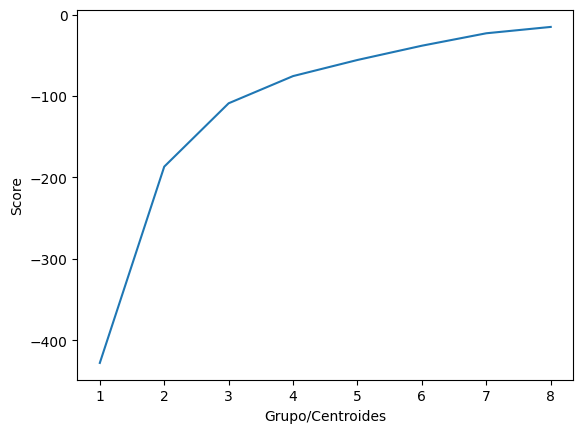

In [90]:
# Aplicamos la curva de Elbow
plt.plot(centers, scores)
plt.xlabel('Grupo/Centroides')
plt.ylabel('Score')
plt.show()

In [91]:
k_means = KMeans(n_clusters=7)

In [92]:
k_means.fit(data)

c:\Users\Sebastian\OneDrive\Documentos\Algorimitca\Practico3\practico3_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [93]:
k_means.cluster_centers_

array([[2.73529412, 3.5       ],
       [6.40740741, 3.55555556],
       [4.        , 3.5       ],
       [8.33333333, 1.        ],
       [0.75      , 3.5       ],
       [5.        , 3.5       ],
       [4.5       , 6.5       ]])

In [94]:
k_means.labels_

array([3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 4, 4, 4, 4, 4, 4])

In [95]:
performance_groups = [
    'Excelente',
    'Muy bueno',
    'Bueno',
    'Regular',
    'Malo',
    'Muy malo',
    'Pésimo'
]

In [114]:
score = 9
prize = 5
predicted = k_means.predict([[score, prize]])
print(f'El rendimiento del equipo es: {performance_groups[predicted[0]]}')

El rendimiento del equipo es: Muy bueno


c:\Users\Sebastian\OneDrive\Documentos\Algorimitca\Practico3\practico3_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [115]:
df['PerfomanceGroup'] = k_means.labels_

In [116]:
df.head()

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,...,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize,PerfomanceGroup
0,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,1,Moscow State University,Russia,Moscow SU Red Panda,Grigory Reznikov,...,True,False,False,False,9,11,0.82,1427,0.0,3
1,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,2,Moscow Institute of Physics & Technology,Russia,Moscow IPT Cryptozoology,Aleksandr Ostanin,...,True,False,False,False,8,11,0.73,960,3.5,1
2,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,3,Peking University,China,Check it out,Huadun Hong,...,True,False,False,False,8,11,0.73,1190,1.0,3
3,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,4,The University of Tokyo,Japan,Cxiv-Dxiv,Kazumi Kasaura,...,True,False,False,False,8,11,0.73,1566,2.0,3
4,2018,2018-04-19,China,Beijing,Peking University's Khoo Teck Puat Gymnasium,5,Seoul National University,South Korea,MolaMola,Bumsoo Park,...,False,True,False,False,7,11,0.64,719,3.5,1


In [117]:
df.to_csv('icpc-2018.csv')